# Разведочный анализ данных

In [1]:
# Импорт нужных библиотек
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(); # более красивый внешний вид графиков по умолчанию

In [2]:
df = pd.read_csv('datasets/Data Sample (AIC).csv')

## Первый взгляд на данные

In [3]:
# Метод head(n) предназначен для просмотра первых n строк таблицы (по умолчанию n=5)
# Аналогично метод tail(n) возвращает последние n строк
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,"2,75",17850.0,United Kingdom


In [4]:
df.UnitPrice = df.UnitPrice.str.replace(',', '.').astype(float) # исправляем значение и тип данных

In [5]:
# Удаляем записи, где количество отрицательное, т.к. вероятно эти записи ошибочные
df = df.drop(np.where(df['Quantity'] < 0)[0]) 

In [6]:
# Если признаков (столбцов) слишком много, полезно будет транспонировать вывод
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
InvoiceNo,536365,536367,536367,536368,536373,536375,536378,536381,536381,536381
StockCode,84029E,84879,21755,22914,84406B,82494L,21033,82567,21169,21175
Description,RED WOOLLY HOTTIE WHITE HEART.,ASSORTED COLOUR BIRD ORNAMENT,LOVE BUILDING BLOCK WORD,BLUE COAT RACK PARIS FASHION,CREAM CUPID HEARTS COAT HANGER,WOODEN FRAME ANTIQUE WHITE,JUMBO BAG CHARLIE AND LOLA TOYS,"AIRLINE LOUNGE,METAL SIGN",YOU'RE CONFUSING ME METAL SIGN,GIN + TONIC DIET METAL SIGN
Quantity,6,32,3,3,8,6,10,2,3,2
InvoiceDate,12/1/10 8:26,12/1/10 8:34,12/1/10 8:34,12/1/10 8:34,12/1/10 9:02,12/1/10 9:32,12/1/10 9:37,12/1/10 9:41,12/1/10 9:41,12/1/10 9:41
UnitPrice,3.39,1.69,5.95,4.95,2.75,2.55,2.95,2.1,1.69,2.1
CustomerID,17850.0,13047.0,13047.0,13047.0,17850.0,17850.0,14688.0,15311.0,15311.0,15311.0
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


In [7]:
# Метод info() позволяет вывести общую информацию о датасете
# Мы можем узнать тип каждого признака, а также есть ли в данных пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53131 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    53131 non-null  object 
 1   StockCode    53131 non-null  object 
 2   Description  53081 non-null  object 
 3   Quantity     53131 non-null  int64  
 4   InvoiceDate  53131 non-null  object 
 5   UnitPrice    53131 non-null  float64
 6   CustomerID   39722 non-null  float64
 7   Country      53131 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.6+ MB


In [8]:
# Метод describe() позволяет собрать некоторую статистику по каждому числовому признаку
# Для более удобного прочтения полученную таблицу можно транспонировать
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,53131.0,10.464324,37.864088,1.0,1.00,3.00,11.00,2400.00
UnitPrice,53131.0,3.827805,17.798373,0.0,1.25,2.08,4.13,1687.17
CustomerID,39722.0,15290.786567,1708.122390,12347.0,13971.00,15159.00,16782.00,18287.00


Обратим внимание, что в показателе Quantity имеются аномалии в виде отрицательных значений

In [9]:
df['Country'].value_counts() #  Количество сделок по странам

United Kingdom          48651
Germany                   909
France                    866
EIRE                      758
Spain                     251
Netherlands               232
Belgium                   206
Switzerland               187
Portugal                  151
Australia                 123
Norway                    105
Channel Islands            81
Italy                      74
Finland                    72
Cyprus                     60
Sweden                     49
Austria                    48
Poland                     42
Unspecified                36
Denmark                    35
Hong Kong                  28
Israel                     27
Japan                      27
Singapore                  24
Iceland                    15
Greece                     14
Canada                     13
USA                        12
Malta                       8
Lithuania                   6
United Arab Emirates        5
European Community          5
RSA                         4
Brazil    

In [10]:
# Параметр normalize позволяет узнать процентное соотношение
(df['Country'].value_counts(normalize=True) * 100)

United Kingdom          91.568011
Germany                  1.710866
France                   1.629934
EIRE                     1.426662
Spain                    0.472417
Netherlands              0.436657
Belgium                  0.387721
Switzerland              0.351960
Portugal                 0.284203
Australia                0.231503
Norway                   0.197625
Channel Islands          0.152453
Italy                    0.139278
Finland                  0.135514
Cyprus                   0.112928
Sweden                   0.092225
Austria                  0.090343
Poland                   0.079050
Unspecified              0.067757
Denmark                  0.065875
Hong Kong                0.052700
Israel                   0.050818
Japan                    0.050818
Singapore                0.045171
Iceland                  0.028232
Greece                   0.026350
Canada                   0.024468
USA                      0.022586
Malta                    0.015057
Lithuania     

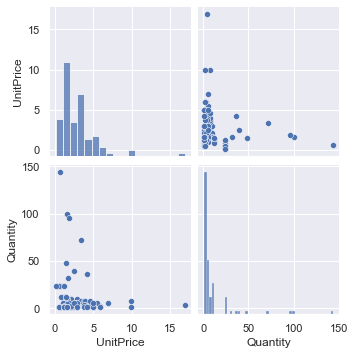

In [11]:
%config InlineBackend.figure_format = 'png'
df = df[:100]
sns_plot = sns.pairplot(df[['UnitPrice', 'Quantity']]);

График по умолчанию оказался малоинформативным. Попробуем улучшить ситуацию, добавив параметр bins.

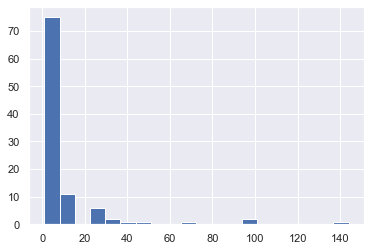

In [12]:
df['Quantity'].hist(bins=20);

Как и ожидалось, имеем нечто похожее на гистограмму нормального распределения. Однако на картнике не видны выбросы (outliers) --- точки, "выбивающиеся" из общей картины. Поэтому иногда полезнее применить boxplot ("ящик с усиками").

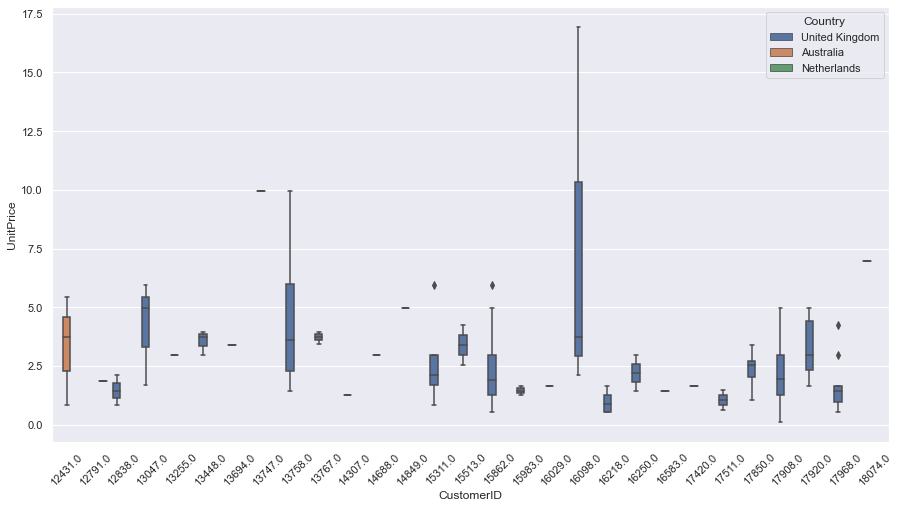

In [13]:
# Строим график продаж по дням
plt.figure(figsize=(15, 8)) # увеличим размер картинки
ax = sns.boxplot(x='CustomerID', y='UnitPrice', hue='Country', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

## Исследуем признаки совместно

### GROUP BY

In [14]:
# Код товара и среднее количество
df.groupby('StockCode')['Quantity'].mean()

StockCode
10125        2.0
15056BL      2.0
20668       24.0
20717        1.0
20728       10.0
           ...  
84879       32.0
84970S     144.0
85099B       2.0
85099C     100.0
90200C       1.0
Name: Quantity, Length: 91, dtype: float64

### Scatter plot
Полезным типом графика для исследования пар числовых признаков является диаграмма рассеяния (scatter plot). Рассмотрим артикул и количество.

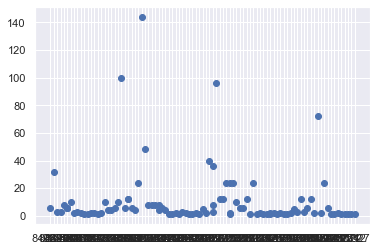

In [15]:
plt.scatter(df['StockCode'], df['Quantity']);

### Сводные таблицы

In [16]:
# values - признаки, по которым вычисляются значения функции aggfunc
# index - признаки, по которым выполняется группировка
df.pivot_table(values=['UnitPrice', 'Country'], index=['Quantity', 'StockCode'], aggfunc='sum')

UnitPrice
Quantity StockCode           
1        20717           1.25
         21116           4.95
         21121           1.25
         21122           1.25
         21212           0.55
...                       ...
48       22174           1.48
72       22189           3.39
96       22867           1.85
100      85099C          1.65
144      84970S          0.64

[97 rows x 1 columns]

In [17]:
# Распределение количества продаж по странам
pd.crosstab(df['Country'], df['Quantity'])

Quantity,1,2,3,4,5,6,8,10,12,24,32,36,40,48,72,96,100,144
Country,,,,,,,,,,,,,,,,,,
Australia,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
Netherlands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
United Kingdom,25,18,7,4,2,11,6,4,7,5,1,1,1,1,1,0,1,1


In [18]:
q = df['Quantity'] # сохраним всю колонку "количество" в отдельную переменную для экспериментов
type(q) # посмотрим тип 
q

0       6
1      32
2       3
3       3
4       8
       ..
98      2
99      1
100     1
101     1
102     1
Name: Quantity, Length: 100, dtype: int64

In [19]:
first_client = df.iloc[0]
print(first_client)

InvoiceNo                              536365
StockCode                              84029E
Description    RED WOOLLY HOTTIE WHITE HEART.
Quantity                                    6
InvoiceDate                      12/1/10 8:26
UnitPrice                                3.39
CustomerID                            17850.0
Country                        United Kingdom
Name: 0, dtype: object


In [20]:
print(df.loc[0, 'Quantity'])

6


In [21]:
df1 = df[[x for x in df.columns if 'Quantity' in x] + ['StockCode']].groupby('StockCode').sum()
df1.head()

,Quantity
StockCode,
10125,2
15056BL,2
20668,24
20717,1
20728,10


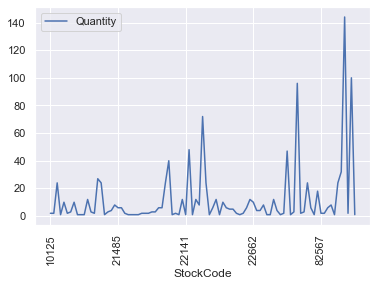

In [22]:
df1.plot(rot=90);

Text(0, 0.5, 'Quantity')

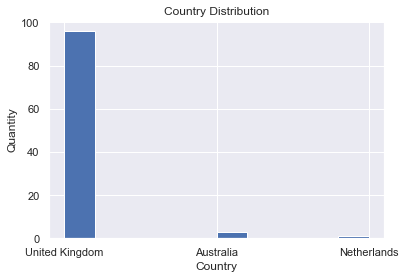

In [23]:
ax = df.Country.hist()
ax.set_title('Country Distribution')
ax.set_xlabel('Country')
ax.set_ylabel('Quantity')

## Рекомендации для бизнеса

1. Получать корректные данные без пропусков (количество не может быть отрицательным, 
    Description и CustomerID содержат пропуски)
2. Наращивать продажи по странам (Основные в Англии, мир не охвачен)
3. Определить наиболее продаваемые и наименее продаваемые товары
4. Определить зависят ли продажи от сезонности
5. Увеличить количество позиций в счете